In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'

In [ ]:
df_structures = pd.read_excel('count_fcc_fractions_byPalette.xlsx')
df_properties = pd.read_excel(
    'v6_Fe_Cr_Ni_Mo_Ti_SSS_FCC_byCompo_wt_pct_ML_fcc_edit.xlsx')

fig_name = 'v6_Fe_Cr_Ni_Mo_Ti_SSS_FCC_byCompo_wt_pct_ML_fcc_edit'

df_structures_Gmin_sort = df_structures.sort_values(
    by='Gmin_FCC_fraction', ascending=False)
df_structures_Gmineq_sort = df_structures.sort_values(
    by='Gmin_eq_FCC_fraction', ascending=False)

display(df_structures_Gmin_sort.head(2))
display(df_structures_Gmineq_sort.head(2))

display(df_properties.head(2))

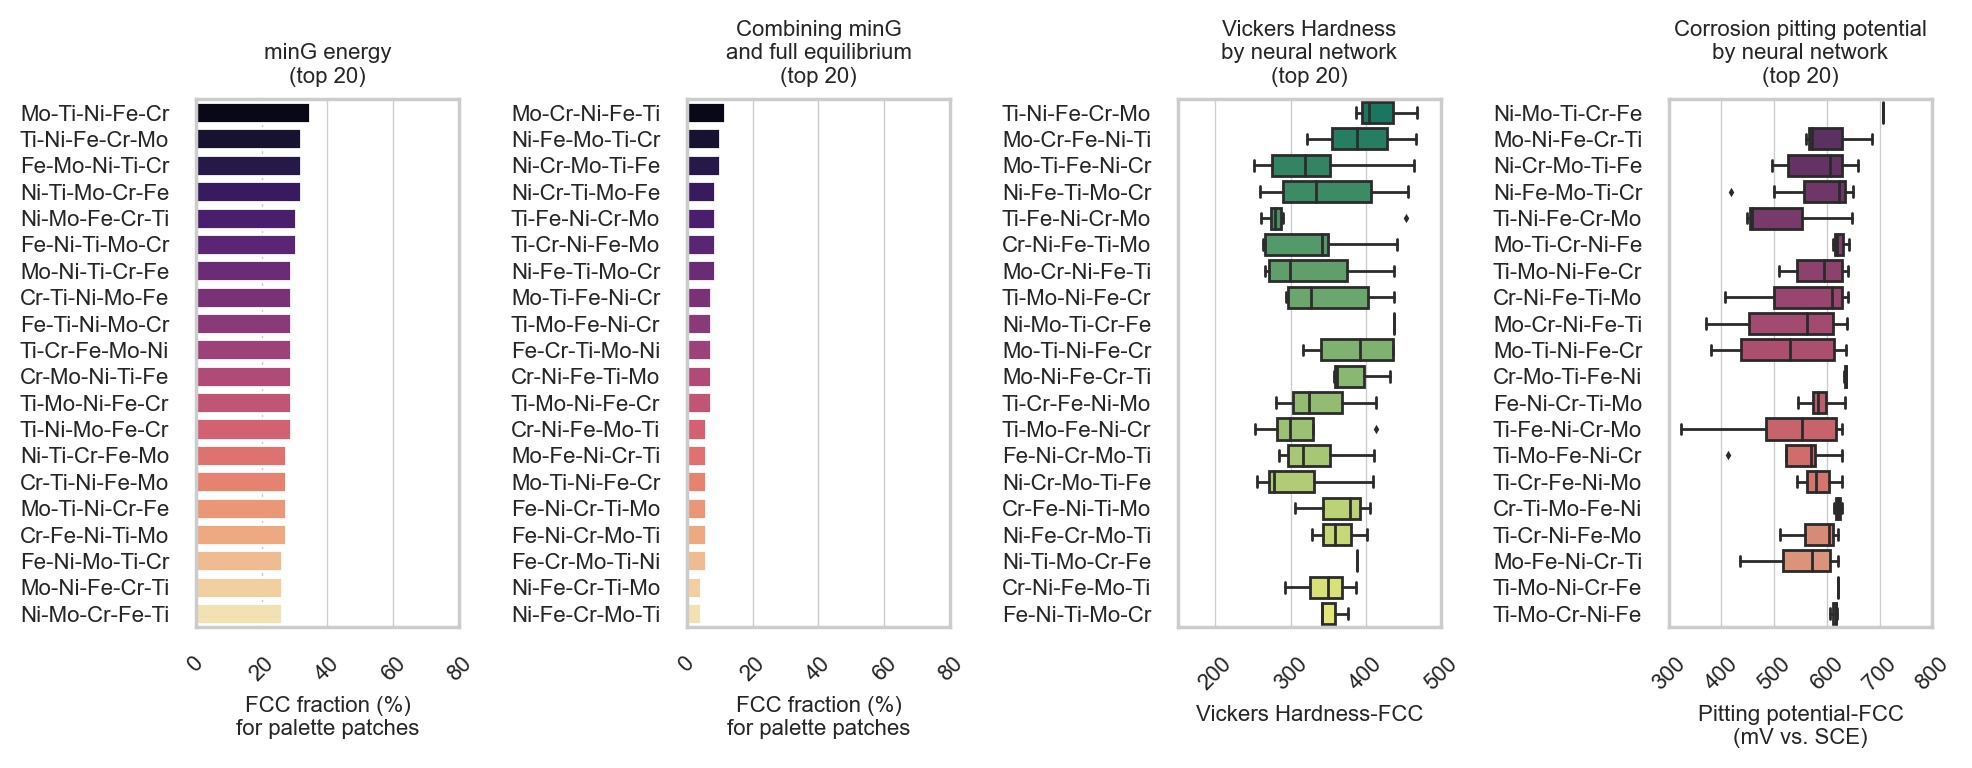

In [8]:
sns.set_theme(style="whitegrid", rc={"axes.grid": True, "grid.linewidth": 0.5})
fig, axs = plt.subplots(ncols=4, figsize=(10, 4), dpi=200)
font_size = 8
top = 20
#
sns.barplot(y='ABCDE', x='Gmin_FCC_fraction', data=df_structures_Gmin_sort.head(
    top), linewidth=1, ax=axs[0], palette="magma")
axs[0].set_title(f"minG energy\n(top {top})", fontsize=font_size)
axs[0].set_xlabel('FCC fraction (%)\nfor palette patches', fontsize=font_size)
axs[0].set_ylabel('')
axs[0].set_xlim([0, 80])
axs[0].set_xticks(range(0, 81, 20))  # Fixed the range here
axs[0].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='both', labelsize=font_size)
axs[0].set_box_aspect(2)


#
sns.barplot(y='ABCDE', x='Gmin_eq_FCC_fraction', data=df_structures_Gmineq_sort.head(
    top), linewidth=1, ax=axs[1], palette="magma")
axs[1].set_title(f"Combining minG\nand full equilibrium\n(top {top})",
                 fontsize=font_size)
axs[1].set_xlabel('FCC fraction (%)\nfor palette patches',
                  fontsize=font_size)
axs[1].set_ylabel('')
axs[1].set_xlim([0, 80])
axs[1].set_xticks(range(0, 81, 20))  # Fixed the range here
axs[1].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='both', labelsize=font_size)
axs[1].set_box_aspect(2)

#
H1_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'H1_new_pred_KFold_mean_FCC'].max()
H1_sorted_groups = H1_max_values.sort_values(ascending=False).head(top).index
sns.boxplot(x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="summer", order=H1_sorted_groups, ax=axs[2])
axs[2].set_title(
    f'Vickers Hardness\nby neural network\n(top {top})', fontsize=font_size)
axs[2].set_xlabel('Vickers Hardness-FCC', fontsize=font_size)
axs[2].set_ylabel(None)
# axs[2].set_yticklabels([])
axs[2].set_xticks(range(0, 501, 100))
axs[2].set_xlim([150, 500])
axs[2].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='both', labelsize=font_size)
axs[2].set_box_aspect(2)

#
C2_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'C2_new_pred_KFold_mean_FCC'].max()
C2_sorted_groups = C2_max_values.sort_values(ascending=False).head(top).index
sns.boxplot(x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="flare_r", order=C2_sorted_groups, ax=axs[3])
axs[3].set_title(
    f'Corrosion pitting potential\nby neural network\n(top {top})', fontsize=font_size)
axs[3].set_xlabel('Pitting potential-FCC\n(mV vs. SCE)',
                  fontsize=font_size)
axs[3].set_ylabel(None)
axs[3].set_xticks(range(300, 801, 100))
axs[3].set_xlim([300, 800])
axs[3].tick_params(axis='x', rotation=45)
axs[3].tick_params(axis='both', labelsize=font_size)
axs[3].set_box_aspect(2)

plt.tight_layout()
plt.savefig(fig_name+'.pdf', bbox_inches='tight')
plt.show()